#  SPORTS ANALYSIS FOR THE IPL (Indian Premier League):

In [1]:
#IMPORTING THE LIBRARIES 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  UNDERSTANDING THE GIVEN DATASET:

In [3]:
df=pd.read_csv(r"deliveries.csv")
dm=pd.read_csv(r"matches.csv")
dm.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
dm.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/5/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
dm.shape

(756, 18)

In [7]:
dm.sort_values("season",ascending=True,inplace=True)
dm

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
116,117,2008,Mumbai,6/1/2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
82,83,2008,Jaipur,5/4/2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
81,82,2008,Mumbai,5/4/2008,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
80,81,2008,Chandigarh,5/3/2008,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
79,80,2008,Hyderabad,5/25/2008,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,11317,2019,Kolkata,12/4/2019,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,S Dhawan,Eden Gardens,Yeshwant Barde,O Nandan,Rod Tucker
722,11318,2019,Mumbai,13/04/19,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,JC Buttler,Wankhede Stadium,Nitin Menon,Nanda Kishore,Marais Erasmus
723,11319,2019,Mohali,13/04/19,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,AB de Villiers,IS Bindra Stadium,S Ravi,Ulhas Gandhe,Nigel Llong
725,11321,2019,Hyderabad,14/04/19,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Delhi Capitals,39,0,K Paul,Rajiv Gandhi Intl. Cricket Stadium,Anil Chaudhary,Bruce Oxenford,Chris Gaffaney


In [8]:
dm.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
dm.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
for col in dm:
    print(dm[col].unique())

[  117    83    82    81    80    79    78    77    76    75    74    73
    84    72    70    69    68    67    66    65    64    63    62    61
    60    71    85    86    87   112   111   110   109   108   107   106
   105   104   103   102   101   100    99    98    97    96    95    94
    93    92    91    90    89    88   115   116   114   113   149   150
   151   152   153   154   155   156   158   159   160   161   118   163
   164   165   166   167   168   169   170   171   172   173   174   148
   162   147   145   119   121   122   123   124   125   126   127   128
   129   130   131   132   133   134   135   136   137   138   139   140
   141   142   143   144   146   157   120   178   205   204   203   202
   201   200   199   198   197   196   195   194   193   206   192   190
   189   188   187   186   185   184   183   182   181   175   176   177
   191   207   208   209   234   233   232   231   230   229   228   227
   226   225   180   223   224   221   210   211   

# DATA VISUALIZATION:

In [11]:
teams=dm.groupby('season')['winner'].value_counts()
teams

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [12]:
# most number of wins per season by the teams
year = 2008
win_df = pd.DataFrame(columns=['year','team','wins'])
for items in teams.iteritems():    
    if items[0][0]==year:
        win_series = pd.DataFrame({'year': [items[0][0]],'team': [items[0][1]],'wins': [items[1]]})
        win_df = win_df.append(win_series)
        year += 1   
win_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


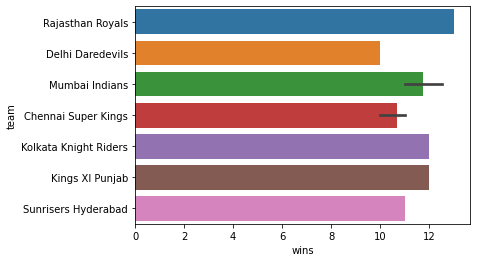

In [13]:
sns.barplot('wins','team' ,data=win_df)

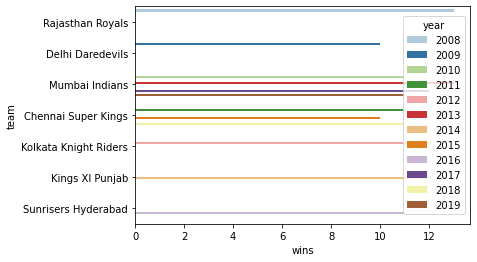

In [14]:
sns.barplot('wins', 'team', hue='year', data=win_df, palette='Paired');

In [15]:
#the most successfull team
team_wins = dm['winner'].value_counts()
team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins.iteritems():
    temp_df1 = pd.DataFrame({'team':[items[0]],'wins':[items[1]]})
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


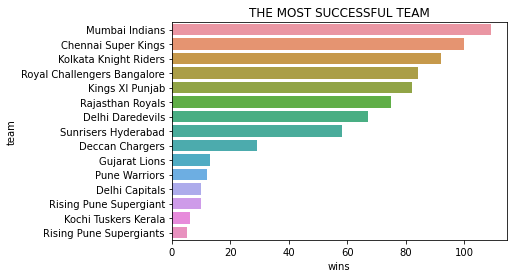

In [16]:
plt.title("THE MOST SUCCESSFUL TEAM")
sns.barplot(x='wins', y='team', data=team_wins_df)

In [17]:
#finding the most valuable player
mvp = dm['player_of_match'].value_counts()
mvp_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp.iteritems():
    if count>9:
        break
    else:
        df2 = pd.DataFrame({'player':[items[0]],'wins':[items[1]]})
        mvp_df = mvp_df.append(df2, ignore_index=True)
        count += 1
mvp_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,MS Dhoni,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


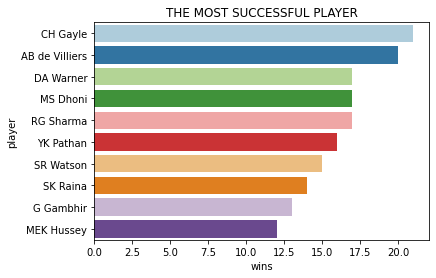

In [18]:
plt.title("THE MOST SUCCESSFUL PLAYER")
sns.barplot(x='wins', y='player', data=mvp_df, palette='Paired')

In [19]:
#Factors considered while winning toss
win_count = 0
for index, value in dm.iterrows():
    if(value['toss_winner']==value['winner']):
        win_count += 1
print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(dm)
print('The probability of winning if won the toss: {:.2f}' .format(prob))

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


In [20]:
# Who wins THE CHASER or THE DEFENDER ?
chase_df=dm['win_by_wickets'].value_counts()
defend_df=dm['win_by_runs'].value_counts()
total_df=chase_df+defend_df
print("Total number of IPL matches played:",total_df)
print("Total number of matches won by defending:",chase_df)
print("Total number of matches won by chasing:",defend_df)

Total number of IPL matches played: 0      769.0
1       13.0
2       13.0
3       23.0
4       52.0
       ...  
130      NaN
138      NaN
140      NaN
144      NaN
146      NaN
Length: 89, dtype: float64
Total number of matches won by defending: 0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64
Total number of matches won by chasing: 0      419
14      13
4       11
10      11
1       10
      ... 
64       1
66       1
67       1
72       1
146      1
Name: win_by_runs, Length: 89, dtype: int64


# FINAL CONCLUSION :


      The most succesful team in IPL was MUMBAI INDIANS with the win of 109 matches and the second            most winning team was CHENNAI SUPER KINGS with the win of 100 matches.
      
      The most successful player was Chris Gayle with the win of 21 Man Of The Matches.
      
   
  Factors including win or loss of a team:
      
      Winning the toss gives a slight edge of advantage(52%) of winning the match.
      
      The total number of matches winning by the chasing team is (419 matches) out of 769 matches. 
      Hence fielding team has slight advantage of winning the match when compared to the batting 
      first team.
    

# Suggesions:
     
    A company can choose teams like  Mumbai Indians, Chennai Super Kings  for endorse its product.
     
    A company can also choose players like Chrise Gayle, AB Devilliers for endorse its products.